In [1]:
import numpy as np
k_o = 0.5

#testing inverse solution
K = np.array([[1,-1,2],[3,2,0],[3,2,0]])
I = np.identity(3)
y = np.array([1,1,-1])
c = 100
W = K-np.dot((1/c),I)
a = np.linalg.solve(W, y)
print(a)

A = np.array([[4,7],[2,6]])
I_2 = np.identity(2)
print(np.linalg.solve(A, I_2))

#K matrix without exceptions
def K_block(n, k_o):
    A = np.identity(n-1)
    D = A
    k_oArr = k_o * np.ones(n-2)
    B = np.diag(k_oArr, k=1) + np.diag(k_oArr, k=-1)
    C = B
    return np.block([[A,B],[B,A]])    
    
#def tridiag_exception()

[  771.92931353 -1163.21002039  -963.21002039]
[[ 0.6 -0.7]
 [-0.2  0.4]]


In [2]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [3]:
import numpy as np
A = np.array([[1,1]])
C = 3 * A
B = np.array([[2]])
D = 2 * B
np.block([[A,B],[C,D]])

array([[1, 1, 2],
       [3, 3, 4]])

In [4]:
import numpy as np

# Define sub-blocks as 2D arrays
A = np.array([[1, 1]])  # 1x2 array
B = np.array([[2]])     # 1x1 array

# Element-wise multiplication to scale the arrays
C = 3 * A  # Multiplies each element in A by 3, resulting in a 1x2 array
D = 2 * B  # Multiplies each element in B by 2, resulting in a 1x1 array

# Combine these sub-blocks into a block matrix using np.block
block_matrix = np.block([[A, B],
                         [C, D]])

print(block_matrix)


[[1 1 2]
 [3 3 4]]


In [5]:
import numpy as np
n=7
k_o = 0.5
diag_len = n-1
B = k_o * np.diag(np.ones((diag_len)), k=1) + k_o * np.diag(np.ones((diag_len)), k=-1)
print(B)

[[0.  0.5 0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.5 0. ]]


In [6]:
import numpy as np

n=7
k_o = 0.49
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s

#K matrix without exceptions
def k_block(n, k_o, return_k):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    diag_len = arr_len-1
    B = k_o * np.diag(np.ones((diag_len)), k=1) + k_o * np.diag(np.ones((diag_len)), k=-1)
    C = B
    E = np.block([[A,B],[B,A]]) 
    if return_k == False:
        return B
    else:
        return E

def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

p = 4
q = 2

#columns in k matrix representing exceptions
def k_exp_horiz(n, p, q, k_o):
    A = e_i(n, p) + e_i(n, q-1)
    B = e_i(n, q) + e_i(n, p-1)
    C = e_i(n, p-1) + e_i(n, q)
    D = e_i(n, q-1) + e_i(n, p)
    E = k_o * np.block([[A,C],[B,D]])

    print('A', A)
    print('B', B)
    print('C', C)
    print('D', D)
    return E


K = k_block(n, k_o, True)
E_1 = k_exp_horiz(n, p, q, k_o)
E_2 = E_1.transpose()
E_3 = np.identity(2) #2 since there's only 2 columns for exceptions

print('K', K)
print('E_1', E_1)
print('E_2', E_2)
print('E_3', E_3)

def k_block_excep(K, E_1, E_2, E_3):
    W = np.concatenate([K, E_1])
    print('W', W)
    X = np.concatenate([E_2, E_3])
    print('X', X)
    Z = np.concatenate([W, X], 1)
    print('Z', Z)
    return Z

K = k_block_excep(K, E_1, E_2, E_3)
print(K)





A [1. 0. 0. 1. 0. 0.]
B [0. 1. 1. 0. 0. 0.]
C [0. 1. 1. 0. 0. 0.]
D [1. 0. 0. 1. 0. 0.]
K [[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
 [0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.   0.   1.  ]]
E_1 [[0.49 0.   0.   0.49 0.   0.   0.   0.49 0.49 0.   0.   0.  ]
 [0.   0.49 0.49 0.   0.   0.   0.49 0.   0.   0.49 0.   0.  ]]
E_2 [[0.49 0.  ]
 [0. 

In [7]:
def K_exp_create(n,p,q,k_o):
    K = k_block(n, k_o, True)
    E_1 = k_exp_horiz(n, p, q, k_o)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

K_exp_create(4, 4, 2, k_o)
print(K_exp_create(4, 4, 2, k_o) == K)

A [1. 0. 0.]
B [0. 1. 1.]
C [0. 1. 1.]
D [1. 0. 0.]
A [1. 0. 0.]
B [0. 1. 1.]
C [0. 1. 1.]
D [1. 0. 0.]
False


C:\Users\lukel\AppData\Local\Temp\ipykernel_43252\354681684.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(K_exp_create(4, 4, 2, k_o) == K)


In [8]:
np.linalg.det(K)

0.00031643838460330704

In [9]:
print(K)
I = np.identity(n-1)

def create_y(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D
y = create_y(n)
print('y', y)
a = np.linalg.solve(K, y)
print(a)

[[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.   0.  ]
 [0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.49]
 [0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
 [0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49 0.  ]
 [0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49]
 [0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.49 0.   0.   0.49 0.   0.   0.   0.49 0.49 0.   0.   0.   1.   0.  ]
 [0.   0.49 0.49 0.   0.   0.   0.49 0.   0.   0.49

In [10]:
#inverse solution for exceptions
K_inv = np.linalg.inv(K)
print(K_inv)
a = np.dot(K_inv, y)
print(a)


[[ 1.77872346 -0.18100356  0.56377777  0.38931158  0.22298852  0.12300791
   0.12839299 -0.72372969  0.32202498 -0.34581423 -0.25103655 -0.10926437
  -0.86550187 -0.08102295]
 [-0.18100356 10.14096258  7.25512284  1.25095464 -0.65075524  0.39525491
  -0.72372969 -7.15161178 -9.26733277  1.00920185 -0.80664268  0.31887007
   7.5210068  -8.66396322]
 [ 0.56377777  7.25512284 10.23238036 -0.64519191  1.07165696 -0.20385653
   0.32202498 -9.26733277 -7.21608144 -1.66194311  0.41603374 -0.52511191
   8.1167659  -7.91231669]
 [ 0.38931158  1.25095464 -0.64519191  3.94448128 -0.54985728  1.24630867
  -0.34581423  1.00920185 -1.66194311  0.85272764 -2.54348707  0.26943007
  -1.80371529 -0.54521131]
 [ 0.22298852 -0.65075524  1.07165696 -0.54985728  2.95605825 -0.17373435
  -0.25103655 -0.80664268  0.41603374 -2.54348707  0.3545599  -1.44846854
   0.35156407  1.16307473]
 [ 0.12300791  0.39525491 -0.20385653  1.24630867 -0.17373435  1.70974959
  -0.10926437  0.31887007 -0.52511191  0.26943007 -

In [11]:
#dual coefficients
print(a)
print(n)


[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
7


In [12]:
# Create a dictionary with keys generated using the index and values from the array
num_coeff = n-1
b = {i: a[i-1] for i in range(1, num_coeff + 1)}
b_bar = {i: a[i-1+n-1] for i in range(1, num_coeff + 1)}
c = {1: a[2 * num_coeff]}
c_bar = {1: a[2 * num_coeff + 1]}
print(b)
print(b_bar)
print(c[1])
print(c_bar[1])

{1: 3.09175363659178, 2: 51.016751195926076, 3: 52.23538258078389, 4: 6.797387847690047, 5: 6.343887413301915, 6: 4.108504832517937}
{1: -3.091753636591781, 2: -51.016751195926076, 3: -52.23538258078389, 4: -6.797387847690052, 5: -6.343887413301911, 6: -4.108504832517939}
46.74786622328979
-46.74786622328979


In [13]:
p
b

{1: 3.09175363659178,
 2: 51.016751195926076,
 3: 52.23538258078389,
 4: 6.797387847690047,
 5: 6.343887413301915,
 6: 4.108504832517937}

In [14]:
#f(j,k)

def e_i(i,n):
    e = np.zeros(n-1)
    if i >= 1 and i < n:
        i = i-1
        e[i] = 1
    return e




In [15]:
# n = 4

# print(e_i(4, 4))

# A = k_block(4, 1, False)
# B = np.linalg.inv(np.identity(n-1) - (A*k_o))
# b_til = B * np.identity(n-1)

# K_mult = np.ones(n-1) - (c[1]*k_o*(e_i(p, 4) + e_i(q-1, 4) - e_i(p-1, 4) - e_i(q, 4)))
# b_analytical = np.dot(B, K_mult)

# c_analytical = 1 - (k_o * (b[q-1] - b[p-1] - b[q]))
# print(b_analytical)
# print(b)
# print(c)
# print(c_analytical)

# print(np.dot(K[2*(n-1),:], a))

In [16]:
np.dot(K, a)
print(p,q)

4 2


In [17]:
print(K)

[[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.   0.  ]
 [0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.49]
 [0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
 [0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49 0.  ]
 [0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49]
 [0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.49 0.   0.   0.49 0.   0.   0.   0.49 0.49 0.   0.   0.   1.   0.  ]
 [0.   0.49 0.49 0.   0.   0.   0.49 0.   0.   0.49

In [18]:
B

array([[0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. ]])

In [19]:
#TODO: b_analytical -> FIX

A = k_block(n, 1, False)
B = np.linalg.inv(np.identity(n-1) - (A*alpha_prime))
b_til = B @ np.ones(n-1)
print(b_til)

K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(p, n) + e_i(q-1, n) - e_i(p-1, n) - e_i(q, n)))
b_analytical = B @ K_mult
print('b_analytical', b_analytical)
print(b)
print(a)

[ 5.15364635  8.47682928 10.10518891 10.10518891  8.47682928  5.15364635]
b_analytical [ 3.09175364 51.0167512  52.23538258  6.79738785  6.34388741  4.10850483]
{1: 3.09175363659178, 2: 51.016751195926076, 3: 52.23538258078389, 4: 6.797387847690047, 5: 6.343887413301915, 6: 4.108504832517937}
[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]


In [20]:
print(p,q)

4 2


In [21]:
# print(e_i(4, n))

# A = k_block(n, k_o, False)
# B = np.linalg.inv(np.identity(n-1) - (A*k_o))
# b_til = B * np.identity(n-1)

# K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(p, n) + e_i(q-1, n) - e_i(p-1, n) - e_i(q, n)))
# b_analytical = np.dot(B, K_mult)

# c_analytical = 1 - (k_o * (b[p] + b[q-1] - b[p-1] - b[q]))
# print('b_analytical', b_analytical)
# print(b)
# print('c_analytical', c_analytical)
# print('c', c)
# print('a', a)
# print('c', c)

# print(np.dot(K[2*(n-1),:], a))

# print(K[2*(n-1),:])
# print(K_mult)

# print(np.identity(n-1) - (A*k_o))

0.3658536585365854
0.09756097560975611
0.024390243902439032
0.0
-0.024390243902439032
-0.09756097560975611
-0.3658536585365854
[0.3658536585365854, 0.09756097560975611, 0.024390243902439032, 0.0, -0.024390243902439032, -0.09756097560975611, -0.3658536585365854]


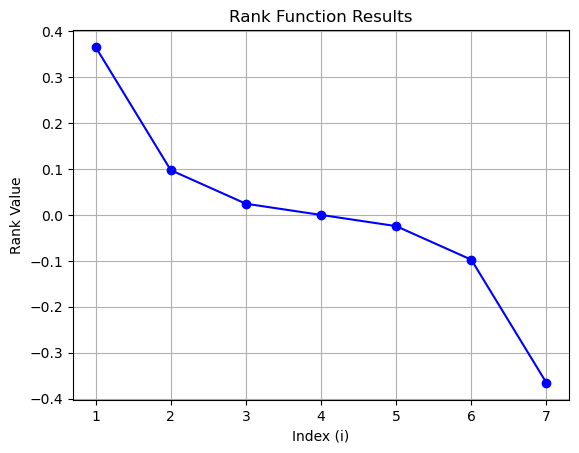

In [22]:
#Non Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

n = 7
index = list(range(1,8))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, 8):
   results[f'r_{i}'] = rank(0.5, 7, i)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()




In [23]:
n

7

In [24]:
print((1/(1-(1-(2*k_o/k_s)))),(1/(1-alpha)), np.arccosh(1/(1-alpha)), lamb(alpha))
print('lambda is correct')

1.0204081632653061 1.0204081632653061 0.20168848779883614 0.20168848779883614
lambda is correct


In [25]:

#exception case
#def rank

def D_exp_matrix(i, j, n, alpha):
    if i <= (j-1):
        num = -2 * np.cosh((i-0.5)*lamb(alpha)) * np.cosh((n-(j-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2)
        denom = np.sinh(lamb(alpha) * n)
        return num/denom
    elif j <= (i-1):
        num = -2 * np.cosh((j-0.5)*lamb(alpha)) * np.cosh((n-(i-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2)
        denom = np.sinh(lamb(alpha) * n)
        return num/denom
    elif i == j:
        return -2 * ( 1 - ( (np.cosh((i-0.5)*lamb(alpha)) * 
                             np.cosh((n-(i-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2) ) / np.sinh(lamb(alpha) * n) ) )
        

#Check this
def c_formula(p, q, n, alpha):
    num = 1 + rank(alpha,n,p) + rank(alpha,n,q)
    denom = 1 - D_exp_matrix(q,q,n,alpha) - D_exp_matrix(p,p,n,alpha) + D_exp_matrix(q,p,n,alpha) + D_exp_matrix(p,q,n,alpha)
    return num/denom

def delta_ij(i,j,k_o,k_s):
    delta_o = k_o/k_s
    if i == j:
        return delta_o
    else:
        return 0

def rank_exp_j(j, p, q, n, alpha, k_o, k_s):
    rank_norm = rank(alpha,n,j)
    rank_add = c_formula(p,q,n,alpha) * ( D_exp_matrix(j,q,n,alpha) - D_exp_matrix(j,p,n,alpha) + delta_ij(j,p,k_o,k_s)) - delta_ij(j,q,k_o,k_s)
    rank_exp = rank_norm + rank_add
    return rank_exp
    
def prediction_2(j,k,p,q,n,alpha,k_o,k_s):
    return rank_exp_j(k,p,q,n,alpha,k_o,k_s) - rank_exp_j(j,p,q,n,alpha,k_o,k_s)


In [26]:
i = 1
j = 2
D_trial = -2 * np.cosh( (i - (1/2)) * lamb(alpha)) * np.cosh( ( n - (j - (1/2)) ) * lamb(alpha)) * np.tanh(lamb(alpha)/2) / np.sinh(lamb(alpha) * n)
print(D_trial)

-0.17597784427879162


In [27]:
num = -2 * np.cosh((i-0.5)*lamb(alpha)) * np.cosh((n-(j-0.5))*lamb(alpha)) * np.tanh(lamb(alpha)/2)
denom = np.sinh(lamb(alpha) * n)
print(num/denom)

-0.17597784427879162


In [28]:
print('D is correct')

D is correct


In [29]:
alpha

0.020000000000000018

In [30]:
n

7

In [31]:
# B
# print(B, '\n', A, '\n', (np.identity(n-1) - (A*k_o)), '\n', np.linalg.inv(np.identity(n-1) - (A*k_o)))
# print('B is correct')

In [32]:
print(D_exp_matrix(1,2,4,alpha))

-0.2544267025779146


In [33]:
k_o

0.49

In [34]:
def K_mult(j,k,p,q,n,k_o):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = k_o
        if k == (i+2):
            arr_1[i] = k_o
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = k_o
        if k == (i+1):
            arr_2[i] = k_o
    arr_3 = np.zeros(2)
    if j == q and k == p:
        arr_3[0] = 1
    if j == p and k == q:
        arr_3[1] = 1 
    if j == q or k == p:
        arr_3[0] = k_o
    if j == p or k == q:
        arr_3[1] = k_o
    
    return np.concatenate([arr_1, arr_2, arr_3])

print(K_mult(1,4,2,4,4,k_o))

[0.49 0.   0.49 0.   0.   0.   0.   0.49]


In [35]:
n

7

In [36]:
print(K_mult(1,2,2,4,4,k_o)) 
print(K_mult(2,3,2,4,4,k_o))
print(K_mult(3,4,2,4,4,k_o)) 
print(K_mult(2,1,2,4,4,k_o))
print(K_mult(3,2,2,4,4,k_o)) 
print(K_mult(4,3,2,4,4,k_o))
print(K_mult(4,2,2,4,4,k_o)) 
print(K_mult(2,4,2,4,4,k_o))

Arr = np.concatenate([
    K_mult(1,2,2,4,4,k_o).reshape(1, -1),
    K_mult(2,3,2,4,4,k_o).reshape(1, -1),
    K_mult(3,4,2,4,4,k_o).reshape(1, -1),
    K_mult(2,1,2,4,4,k_o).reshape(1, -1),
    K_mult(3,2,2,4,4,k_o).reshape(1, -1),
    K_mult(4,3,2,4,4,k_o).reshape(1, -1),
    K_mult(4,2,2,4,4,k_o).reshape(1, -1),
    K_mult(2,4,2,4,4,k_o).reshape(1, -1)
], axis=0)
print(Arr)

print(K)

print(Arr == K)


[1.   0.   0.   0.   0.49 0.   0.49 0.  ]
[0.   1.   0.   0.49 0.   0.49 0.   0.49]
[0.   0.   1.   0.   0.49 0.   0.   0.49]
[0.   0.49 0.   1.   0.   0.   0.   0.49]
[0.49 0.   0.49 0.   1.   0.   0.49 0.  ]
[0.   0.49 0.   0.   0.   1.   0.49 0.  ]
[0.49 0.   0.   0.   0.49 0.49 0.49 0.  ]
[0.   0.49 0.49 0.49 0.   0.   0.   0.49]
[[1.   0.   0.   0.   0.49 0.   0.49 0.  ]
 [0.   1.   0.   0.49 0.   0.49 0.   0.49]
 [0.   0.   1.   0.   0.49 0.   0.   0.49]
 [0.   0.49 0.   1.   0.   0.   0.   0.49]
 [0.49 0.   0.49 0.   1.   0.   0.49 0.  ]
 [0.   0.49 0.   0.   0.   1.   0.49 0.  ]
 [0.49 0.   0.   0.   0.49 0.49 0.49 0.  ]
 [0.   0.49 0.49 0.49 0.   0.   0.   0.49]]
[[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   

C:\Users\lukel\AppData\Local\Temp\ipykernel_43252\1592236515.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(Arr == K)


In [37]:

print(K_mult(1,2,2,4,4,k_o), K[0,:])
print(K == K_exp_create(n,p,q,k_o))
print(np.dot(K_exp_create(n,p,q,k_o), a))
print('K_mult works')

[1.   0.   0.   0.   0.49 0.   0.49 0.  ] [1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]


ValueError: operands could not be broadcast together with shapes (3,) (0,) 

In [ ]:
j=1
k=4
print(j,k)
print(K_mult(j,k,p,q,n,k_o))
print(a)
print(np.dot(K_mult(j,k,p,q,n,k_o), a))

K_mult(j,k,p,q,n,k_o)

print(a)
print(np.dot(K_mult(j,k,p,q,n,k_o), a))

def prediction_1(j,k,p,q,n,k_o):
    return(np.dot(K_mult(j,k,p,q,n,k_o), a))

print(prediction_1(j,k,p,q,n,k_o))

print(j,k,p,q,n,k_o)

#Method 2 prediction
print(prediction_2(j,k,p,q,n,alpha,k_o,k_s))


1 4
[0.49 0.   0.49 0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.49 0.  ]
[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
46.68603115055795
[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
46.68603115055795
46.68603115055795
1 4 4 2 7 0.49
-1.1852558866648193


In [ ]:
print(K_mult(j,k,p,q,n,k_o))
print(a)
print(K)
print(np.dot(K,a))

[0.49 0.   0.49 0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.49 0.  ]
[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
[[1.   0.   0.   0.   0.   0.   0.   0.49 0.   0.   0.   0.   0.49 0.  ]
 [0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.   0.49]
 [0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.   0.   0.49]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.   0.   0.  ]
 [0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.49]
 [0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.49 0.  ]
 [0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49 0.  ]
 [0.   0.   0.49 0.   0.49 0.   0.   0.   0.   1.   0.   0.   0.   0.49]
 [0.   0.   

In [ ]:
b

{1: 3.09175363659178,
 2: 51.016751195926076,
 3: 52.23538258078389,
 4: 6.797387847690047,
 5: 6.343887413301915,
 6: 4.108504832517937}

In [ ]:
#Rank

def delta_ij(i,j,k_o,k_s):
    delta_o = k_o/k_s
    if i == j:
        return delta_o
    else:
        return 0
    
def get_b(i, b):
    if i < 1 or i >= len(b):
        return 0
    else:
        return b[i]
    
def get_c(c):
    return c[1]

def rank_method1(j, b, c, k_o, k_s):
    alpha_prime = k_o/k_s
    rank = alpha_prime * ( get_b(j-1, b) - get_b(j, b) + ( get_c(c) * (delta_ij(j, q, k_o, k_s) - delta_ij(j, p, k_o, k_s) ) ) )
    return rank

In [ ]:
get_b(5, b)

6.343887413301915

In [ ]:
print(a)
print(b)
a


[  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
{1: 3.09175363659178, 2: 51.016751195926076, 3: 52.23538258078389, 4: 6.797387847690047, 5: 6.343887413301915, 6: 4.108504832517937}


array([  3.09175364,  51.0167512 ,  52.23538258,   6.79738785,
         6.34388741,   4.10850483,  -3.09175364, -51.0167512 ,
       -52.23538258,  -6.79738785,  -6.34388741,  -4.10850483,
        46.74786622, -46.74786622])

In [ ]:
print(p,q, n)
print(np.dot(K, a))

4 2 7
[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]


In [ ]:
print(e_i(4, n))

A = k_block(n, k_o, False)
B = np.linalg.inv(np.identity(n-1) - (A*k_o))
b_til = B * np.identity(n-1)

K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(n, p) + e_i(n, q-1) - e_i(n, p-1) - e_i(n, q)))
b_analytical = np.dot(B, K_mult)

c_analytical = 1 - (k_o * (b[q-1] - b[p-1] - b[q]))
print(b_analytical)
print(b)
print('c_analytical', c_analytical)
print('c', c)
print('a', a)
print('c', c)

print(np.dot(K[2*(n-1),:], a))

print(K[2*(n-1),:])
print(K_mult)

print(np.identity(n-1) - (A*k_o))

[0. 0. 0.]
[-15.54244887  26.5056459   26.36790266 -16.25388327  -2.82533215
   0.32163775]
{1: 3.09175363659178, 2: 51.016751195926076, 3: 52.23538258078389, 4: 6.797387847690047, 5: 6.343887413301915, 6: 4.108504832517937}
c_analytical 50.07858626865791
c {1: 46.74786622328979}
a [  3.09175364  51.0167512   52.23538258   6.79738785   6.34388741
   4.10850483  -3.09175364 -51.0167512  -52.23538258  -6.79738785
  -6.34388741  -4.10850483  46.74786622 -46.74786622]
c {1: 46.74786622328979}
1.0000000000000036
[0.49 0.   0.   0.49 0.   0.   0.   0.49 0.49 0.   0.   0.   1.   0.  ]
[-21.90645445  23.90645445  23.90645445 -21.90645445   1.
   1.        ]
[[ 1.     -0.2401  0.      0.      0.      0.    ]
 [-0.2401  1.     -0.2401  0.      0.      0.    ]
 [ 0.     -0.2401  1.     -0.2401  0.      0.    ]
 [ 0.      0.     -0.2401  1.     -0.2401  0.    ]
 [ 0.      0.      0.     -0.2401  1.     -0.2401]
 [ 0.      0.      0.      0.     -0.2401  1.    ]]


In [ ]:
print(A)
print(K_mult)
print(B)

[[0.   0.49 0.   0.   0.   0.  ]
 [0.49 0.   0.49 0.   0.   0.  ]
 [0.   0.49 0.   0.49 0.   0.  ]
 [0.   0.   0.49 0.   0.49 0.  ]
 [0.   0.   0.   0.49 0.   0.49]
 [0.   0.   0.   0.   0.49 0.  ]]
[-21.90645445  23.90645445  23.90645445 -21.90645445   1.
   1.        ]
[[1.06543975e+00 2.72552079e-01 6.97209258e-02 1.78307855e-02
  4.54307059e-03 1.09079125e-03]
 [2.72552079e-01 1.13516068e+00 2.90382865e-01 7.42639964e-02
  1.89215768e-02 4.54307059e-03]
 [6.97209258e-02 2.90382865e-01 1.13970375e+00 2.91473656e-01
  7.42639964e-02 1.78307855e-02]
 [1.78307855e-02 7.42639964e-02 2.91473656e-01 1.13970375e+00
  2.90382865e-01 6.97209258e-02]
 [4.54307059e-03 1.89215768e-02 7.42639964e-02 2.90382865e-01
  1.13516068e+00 2.72552079e-01]
 [1.09079125e-03 4.54307059e-03 1.78307855e-02 6.97209258e-02
  2.72552079e-01 1.06543975e+00]]


In [ ]:
rank_method1(1, b, c, k_o, k_s) - rank_method1(3, b, c, k_o, k_s) == prediction_1(1,3,2,4,7,k_o)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
rank_method1(1, b, c, k_o, k_s) - rank_method1(3, b, c, k_o, k_s)

-26.51316736793375

In [ ]:
prediction_1(1,4,2,4,7,k_o)

0.8731222517339532

-1.5149592819299722
-24.225578852219492
24.99820808600378
0.7423300481456866
0.0
0.0
0.0
[-1.5149592819299722, -24.225578852219492, 24.99820808600378, 0.7423300481456866, 0.0, 0.0, 0.0]


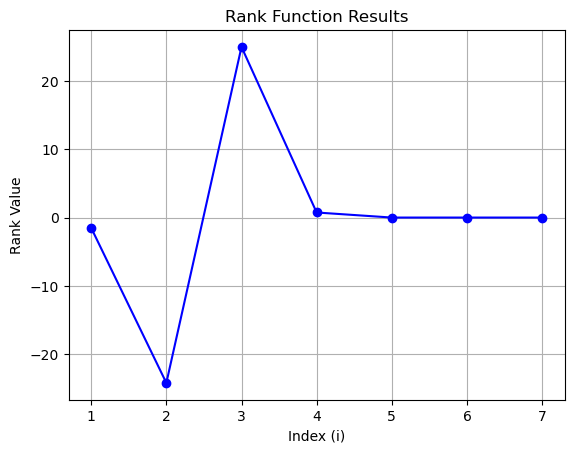

In [ ]:
#Exception Ranking

import numpy as np
import matplotlib.pyplot as plt

def lamb(alpha):
    return np.arccosh(1 / (1-alpha))

#non adjacent test cases
def rank(alpha, n, i):
    num = np.sinh(( ((n+1)/2) - i) * lamb(alpha))
    denom = np.sinh(((n+1)/2) * lamb(alpha)) - np.sinh(((n-1)/2) * lamb(alpha))
    return num / denom

n = 7
index = list(range(1,8))

results = {}
results_array = []

# Set variables dynamically
for i in range(1, 8):
   results[f'r_{i}'] = rank_method1(i, b, c, k_o, k_s)
   print(results[f'r_{i}'])
   results_array.append(results[f'r_{i}'])

print(results_array)

plt.plot(index, results_array, marker='o', linestyle='-', color='b')
plt.title('Rank Function Results')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


